# Assignment 4

## Step 1 – Data Preprocessing

In [1]:
# Importing libraries and reading features list from ‘kddcup.names’ file.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 
# reading features list 
with open("kddcup.names.txt", 'r') as f: 
    print(f.read()) 

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [2]:
# Appending columns to the dataset and adding a new column name ‘target’ to the dataset.
cols ="""duration, 
protocol_type, 
service, 
flag, 
src_bytes, 
dst_bytes, 
land, 
wrong_fragment, 
urgent, 
hot, 
num_failed_logins, 
logged_in, 
num_compromised, 
root_shell, 
su_attempted, 
num_root, 
num_file_creations, 
num_shells, 
num_access_files, 
num_outbound_cmds, 
is_host_login, 
is_guest_login, 
count, 
srv_count, 
serror_rate, 
srv_serror_rate, 
rerror_rate, 
srv_rerror_rate, 
same_srv_rate, 
diff_srv_rate, 
srv_diff_host_rate, 
dst_host_count, 
dst_host_srv_count, 
dst_host_same_srv_rate, 
dst_host_diff_srv_rate, 
dst_host_same_src_port_rate, 
dst_host_srv_diff_host_rate, 
dst_host_serror_rate, 
dst_host_srv_serror_rate, 
dst_host_rerror_rate, 
dst_host_srv_rerror_rate"""
  
columns =[] 
for c in cols.split(', '): 
    if(c.strip()):
        columns.append(c.strip()) 
    
columns.append('target') 
print(len(columns)) 

42


In [3]:
# Reading the ‘attack_types’ file.
with open("training_attack_types.txt", 'r') as f: 
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [4]:
# Creating a dictionary of attack_types
attacks_types = { 
    'normal': 'normal', 
'back': 'dos', 
'buffer_overflow': 'u2r', 
'ftp_write': 'r2l', 
'guess_passwd': 'r2l', 
'imap': 'r2l', 
'ipsweep': 'probe', 
'land': 'dos', 
'loadmodule': 'u2r', 
'multihop': 'r2l', 
'neptune': 'dos', 
'nmap': 'probe', 
'perl': 'u2r', 
'phf': 'r2l', 
'pod': 'dos', 
'portsweep': 'probe', 
'rootkit': 'u2r', 
'satan': 'probe', 
'smurf': 'dos', 
'spy': 'r2l', 
'teardrop': 'dos', 
'warezclient': 'r2l', 
'warezmaster': 'r2l', 
} 

In [5]:
# Reading the dataset(‘kddcup.data_10_percent.gz’)
# and adding Attack Type feature in the training dataset where attack type feature has 5 distinct values
# i.e. dos, normal, probe, r2l, u2r.
path = "kddcup.data_10_percent.gz"
df = pd.read_csv(path, names = columns)

# Adding Attack Type column 
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]]) 
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [6]:
# Shape of dataframe and getting data type of each feature
df.shape 

(494021, 43)

In [7]:
# Finding missing values of all features.
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
# Finding categorical features 
num_cols = df._get_numeric_data().columns 
  
cate_cols = list(set(df.columns)-set(num_cols)) 
cate_cols.remove('target') 
cate_cols.remove('Attack Type') 
  
cate_cols

['protocol_type', 'service', 'flag']

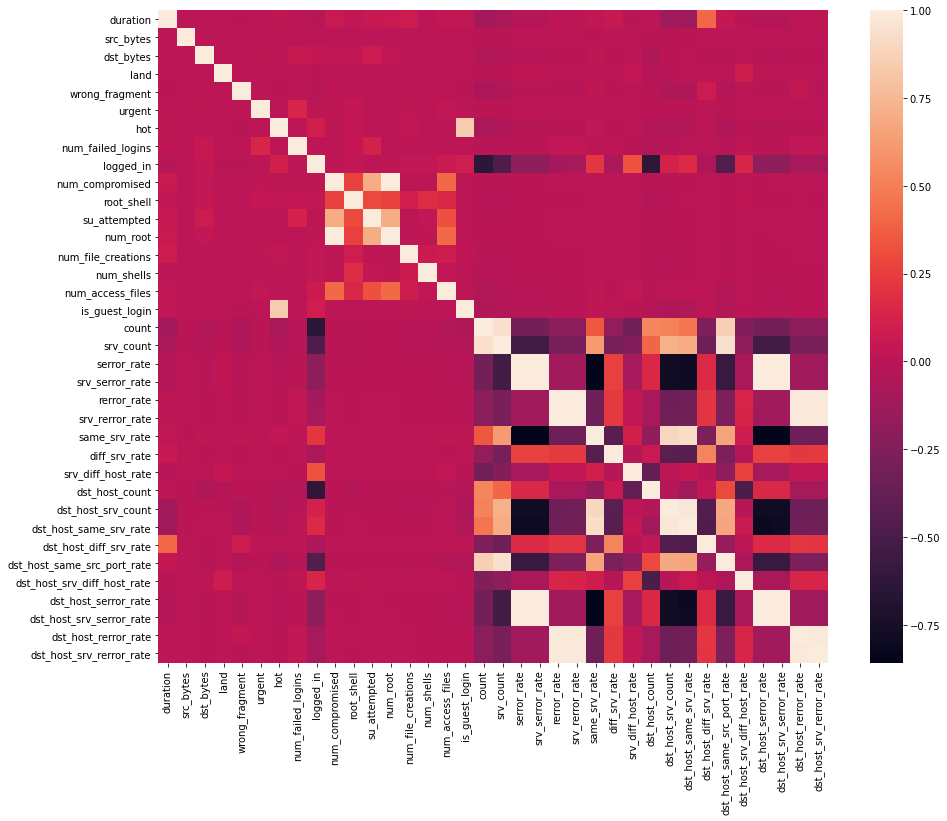

In [9]:
# Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.
# drop columns with NaN 
df = df.dropna('columns')

# keep columns where there are more than 1 unique values 
df = df[[col for col in df if df[col].nunique() > 1]]

corr = df.corr() 
  
plt.figure(figsize =(15, 12)) 
  
sns.heatmap(corr) 
  
plt.show() 

In [10]:
# This variable is highly correlated with num_compromised and should be ignored for analysis. 
#(Correlation = 0.9938277978738366) 
df.drop('num_root', axis = 1, inplace = True) 
  
# This variable is highly correlated with serror_rate and should be ignored for analysis. 
#(Correlation = 0.9983615072725952) 
df.drop('srv_serror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9947309539817937) 
df.drop('srv_rerror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with srv_serror_rate and should be ignored for analysis. 
#(Correlation = 0.9993041091850098) 
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9869947924956001) 
df.drop('dst_host_serror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9821663427308375) 
df.drop('dst_host_rerror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9851995540751249) 
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True) 
  
# This variable is highly correlated with srv_rerror_rate and should be ignored for analysis. 
#(Correlation = 0.9865705438845669) 
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

In [11]:
# Feature Mapping – Apply feature mapping on features such as : ‘protocol_type’ & ‘flag’.
# protocol_type feature mapping 
pmap = {'icmp':0, 'tcp':1, 'udp':2} 
df['protocol_type'] = df['protocol_type'].map(pmap)

# flag feature mapping 
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10} 
df['flag'] = df['flag'].map(fmap) 

In [12]:
# Remove irrelevant features such as ‘service’ before modelling
df.drop('service', axis = 1, inplace = True)

## Step 2 – Modelling

In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Splitting the dataset 
df = df.drop(['target', ], axis = 1) 
print(df.shape) 
  
# Target variable and train set 
y = df[['Attack Type']] 
X = df.drop(['Attack Type', ], axis = 1) 
  
sc = MinMaxScaler() 
X = sc.fit_transform(X) 
  
# Split test and train data  (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape)

(494021, 31)
(395216, 30) (98805, 30)
(395216, 1) (98805, 1)


In [15]:
# assigning values to attack type based on whether it's dos or non-dos in the training data
for i in range(len(y_train.values)):
    if y_train.values[i] == 'dos':
        y_train.values[i] = 0
    else:
        y_train.values[i] = 1

In [16]:
# assigning values to attack type based on whether it's dos or non-dos in the testing data
for i in range(len(y_test.values)):
    if y_test.values[i] == 'dos':
        y_test.values[i] = 0
    else:
        y_test.values[i] = 1

In [17]:
# UnderSampling the imbalanced data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
y_train = y_train.astype('int') 
X_train, y_train = rus.fit_resample(X_train, y_train)
print(X_train.shape, y_train.shape)

(164226, 30) (164226, 1)


In [18]:
# Python Implementation of the Support Vector Classifier
from sklearn.svm import SVC 
  
clfs = SVC(gamma = 'scale') 
start_time = time.time() 
clfs.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 

Training time:  196.28778195381165


In [19]:
start_time = time.time() 
y_test_pred = clfs.predict(X_test) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  4.117983818054199


In [20]:
y_test = y_test.astype('int')
print("Train score is:", clfs.score(X_train, y_train)) 
print("Test score is:", clfs.score(X_test, y_test)) 

Train score is: 0.9967240266462071
Test score is: 0.9953038813825211


# Running SVM model using 4 different types of kernel

# Running SVM model using 'rbf' kernel

In [21]:
clfs = SVC(kernel='rbf', gamma = 'scale') 
start_time = time.time() 
clfs.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 

Training time:  200.58483910560608


In [22]:
start_time = time.time() 
y_test_pred = clfs.predict(X_test) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  4.122506856918335


In [23]:
y_test = y_test.astype('int')
print("Train score is:", clfs.score(X_train, y_train)) 
print("Test score is:", clfs.score(X_test, y_test)) 

Train score is: 0.9967240266462071
Test score is: 0.9953038813825211


# Running SVM model using 'poly' kernel

In [24]:
clfs = SVC(kernel='poly', gamma = 'scale') 
start_time = time.time() 
clfs.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 

Training time:  110.499342918396


In [25]:
start_time = time.time() 
y_test_pred = clfs.predict(X_test) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  3.14808988571167


In [26]:
y_test = y_test.astype('int')
print("Train score is:", clfs.score(X_train, y_train)) 
print("Test score is:", clfs.score(X_test, y_test)) 

Train score is: 0.9988065227186925
Test score is: 0.9985122210414453


# Running SVM model using 'sigmoid' kernel

In [27]:
clfs = SVC(kernel='sigmoid', gamma = 'scale') 
start_time = time.time() 
clfs.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 

Training time:  383.9367480278015


In [28]:
start_time = time.time() 
y_test_pred = clfs.predict(X_test) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  25.592819929122925


In [29]:
y_test = y_test.astype('int')
print("Train score is:", clfs.score(X_train, y_train)) 
print("Test score is:", clfs.score(X_test, y_test)) 

Train score is: 0.9662964451426692
Test score is: 0.9722584889428673


# Running SVM model using 'linear' kernel

In [30]:
clfs = SVC(kernel='linear', gamma = 'scale') 
start_time = time.time() 
clfs.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 

Training time:  89.49196910858154


In [31]:
start_time = time.time() 
y_test_pred = clfs.predict(X_test) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  3.4600067138671875


In [32]:
y_test = y_test.astype('int')
print("Train score is:", clfs.score(X_train, y_train)) 
print("Test score is:", clfs.score(X_test, y_test)) 

Train score is: 0.9960907529867378
Test score is: 0.9948281969535955


# Comparing training and testing accuracies of SVM using 4 different kernels

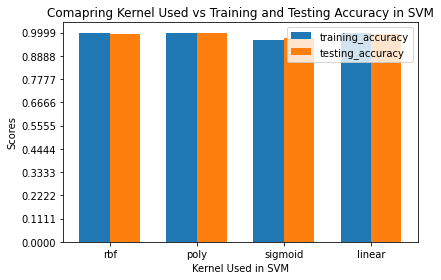

In [33]:
train_accuracy = [0.9967240266462071, 0.9988065227186925, 0.9662964451426692, 0.9960907529867378]
test_accuracy = [0.9953038813825211, 0.9985122210414453, 0.9722584889428673, 0.9948281969535955]
kernels_used = ['rbf', 'poly', 'sigmoid', 'linear']
x = np.arange(len(kernels_used))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracy, width, label='training_accuracy')
rects2 = ax.bar(x + width/2, test_accuracy, width, label='testing_accuracy')
ax.set_ylabel('Scores')
ax.set_xlabel('Kernel Used in SVM')
ax.set_title('Comapring Kernel Used vs Training and Testing Accuracy in SVM')
ax.set_xticks(x)
ax.set_xticklabels(kernels_used)
ax.legend()

plt.yticks(np.arange(1, step=0.1111))
fig.tight_layout()

plt.show()

## From the above comparison graph, we can see that 'poly' kernel is giving the highest accuracy for our dataset, while the sigmoid kernel gives the lowest accuracy. Although there is very little difference between the accuracies given by these 4 different kernels, but we see here that there is almost 2% accuracy difference in case of 'poly' and 'sigmoid' kernel's use.

## Finding most important features

In [34]:
coefs = clfs.coef_[0]
abs_weights = np.abs(coefs)
abs_weights

array([ 2.69578769,  1.62211552,  2.49191659,  1.16877043,  0.22417253,
        0.8875385 ,  7.98234488,  0.        , 12.37102268,  0.8       ,
        0.55837095,  0.46719457,  1.        ,  0.        ,  1.07142857,
        0.5       ,  0.375     , 11.69564399,  1.43956889,  1.36253778,
        2.87741697,  1.44600273,  2.23677223,  2.60059037,  0.08819435,
        0.54904974,  0.05778332,  3.06568687,  0.15734593,  0.11047407])

In [35]:
sorted_index = np.argsort(abs_weights)[::-1]
sorted_index

array([ 8, 17,  6, 27, 20,  0, 23,  2, 22,  1, 21, 18, 19,  3, 14, 12,  5,
        9, 10, 25, 15, 11, 16,  4, 28, 29, 24, 26, 13,  7])

In [36]:
print("Two most important feature names:\n")
for i in [8, 17]:
    print(columns[i])

Two most important feature names:

urgent
num_shells


In [37]:
# Swapping columns so that columns at index 8 and 17 move to index 0 and 1 respectively
X_train[:,[0, 8]] = X_train[:,[8, 0]]
X_train[:,[1, 17]] = X_train[:,[17, 1]]

In [38]:
# Delete all features except the two most important ones
X_train = np.delete(X_train, np.s_[2:], axis=1)

In [39]:
# Swapping columns so that columns at index 8 and 17 move to index 0 and 1 respectively
X_test[:,[0, 8]] = X_test[:,[8, 0]]
X_test[:,[1, 17]] = X_test[:,[17, 1]]

In [40]:
# Delete all features except the two most important ones
X_test = np.delete(X_test, np.s_[2:], axis=1)

# Running SVM model using Linear Kernel and our 2 selected features

In [41]:
clfs = SVC(kernel='linear', gamma = 'scale') 
start_time = time.time() 
clfs.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 

Training time:  154.6169948577881


In [42]:
start_time = time.time() 
y_test_pred = clfs.predict(X_test) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  76.49149894714355


In [43]:
y_test = y_test.astype('int')
print("Train score is:", clfs.score(X_train, y_train)) 
print("Test score is:", clfs.score(X_test, y_test)) 

Train score is: 0.5033490433914241
Test score is: 0.7943929963058549


# Running SVM model using rbf kernel and our 2 selected features

In [44]:
clfs = SVC(kernel='rbf', gamma = 'scale') 
start_time = time.time() 
clfs.fit(X_train, y_train.values.ravel()) 
end_time = time.time() 
print("Training time: ", end_time-start_time) 

Training time:  222.45590138435364


In [45]:
start_time = time.time() 
y_test_pred = clfs.predict(X_test) 
end_time = time.time() 
print("Testing time: ", end_time-start_time) 

Testing time:  122.30940318107605


In [46]:
y_test = y_test.astype('int')
print("Train score is:", clfs.score(X_train, y_train)) 
print("Test score is:", clfs.score(X_test, y_test)) 

Train score is: 0.5044633614652978
Test score is: 0.7947978341177065


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


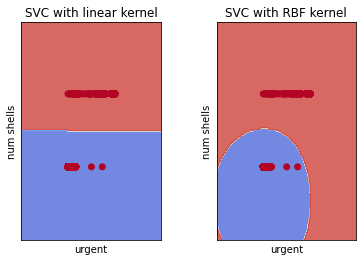

In [47]:
from sklearn import svm

X = X_train
y = y_train.to_numpy()

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
# Running SVM using 'Linear' Kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
# Running SVM using 'rbf' Kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel']


for i, clf in enumerate((svc, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('urgent')
    plt.ylabel('num shells')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### The data was classified pretty accurately using 'urgent' and 'num shells' features. Using the 'linear' kernel, the line boundry clearly seperated the classes of 'dos' vs 'non-dos' attacks. In case of 'rbf' kernel, there is a curved boundry that seperates the 'dos' and 'non-dos' attacks. The SVM model with both the kernels classfied the data with very high accuracy.

Major Reference: GeeksforGeeks